#TRABALHO FINAL DE TÓPICOS ESPECIAIS II
##**Análise de Dados e Predição de Vencedores do UFC**

### Jayor Nesi Teixeira (16201994)
### Rodrigo Bueno Guedes (15102830)

# PRÉ PROCESSAMENTO
# 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dados = pd.read_csv('data.csv')

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [13]:
dados.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,...,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,...,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,...,6.156250,1.781250,1.781250,9.656250,8.093750,58.312500,30.437500,63.312500,23.125000,6.968750,3.656250,5.0000,4.125000,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.718750,10.953125,9.046875,3.390625,3.140625,45.875000,20.281250,36.343750,18.687500,11.328125,8.562500,1.4375,1.171875,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,0.535625,0.57875,0.185,0.16625,0.125,0.1875,0.25,0.0,109.1875,57.9375,50.625,28.4375,170.4375,105.625,74.375,44.25,5.375,1.5,2.0,0.625,77.375,31.375,41.5625,22.625,31.1875,26.1875,7.6875,4.9375,0.625,0.375,...,31.658203,5.683594,4.862305,16.903320,14.203125,85.845703,27.907227,106.913086,48.479492,18.996094,13.970703,35.3125,32.059570,4.489258,2.484375,6.621094,4.015625,141.285156,310.152344,874.380859,30,0,2,0,2,5,6,0,0,0,1,2,2,0,Orthodox,167.64,172.72,1

In [14]:
df = dados[['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 
            'B_total_rounds_fought','B_total_title_bouts', 'B_wins', 'B_losses', 'B_draw', 'B_win_by_KO/TKO', 'B_Stance', 
            'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age',
            'R_total_rounds_fought','R_total_title_bouts', 'R_wins', 'R_losses', 'R_draw', 'R_win_by_KO/TKO', 'R_Stance', 
            'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age']]

In [15]:
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_total_rounds_fought,B_total_title_bouts,B_wins,B_losses,B_draw,B_win_by_KO/TKO,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,R_total_rounds_fought,R_total_title_bouts,R_wins,R_losses,R_draw,R_win_by_KO/TKO,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,4,0,1,1,0,0,Orthodox,165.10,170.18,135.0,31.0,1,0,1,0,0,1,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,4,0,2,0,0,1,Orthodox,187.96,193.04,205.0,32.0,17,0,4,2,0,3,Orthodox,182.88,187.96,185.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,0,0,0,0,0,0,Orthodox,187.96,190.50,241.0,32.0,13,0,4,3,0,3,Southpaw,187.96,190.50,264.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,0,0,0,0,0,0,Southpaw,152.40,154.94,115.0,28.0,0,0,0,0,0,0,Switch,160.02,160.02,115.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,11,1,4,1,0,2,Orthodox,180.34,182.88,135.0,29.0,30,0,5,6,0,2,Orthodox,167.64,172.72,135.0,43.0


In [16]:
divisao = df["location"].str.split(',')

In [17]:
divisao

0       [Las Vegas,  Nevada,  USA]
1       [Las Vegas,  Nevada,  USA]
2       [Las Vegas,  Nevada,  USA]
3       [Las Vegas,  Nevada,  USA]
4       [Las Vegas,  Nevada,  USA]
                   ...            
6007     [Denver,  Colorado,  USA]
6008     [Denver,  Colorado,  USA]
6009     [Denver,  Colorado,  USA]
6010     [Denver,  Colorado,  USA]
6011     [Denver,  Colorado,  USA]
Name: location, Length: 6012, dtype: object

In [18]:
cidade_estado = divisao.str.get(0) + ", " + divisao.str.get(1)
pais = divisao.str.get(2)

In [19]:
df["City/State"] = cidade_estado
df["Country"] = pais

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_fighter              6012 non-null   object 
 1   B_fighter              6012 non-null   object 
 2   Referee                5980 non-null   object 
 3   date                   6012 non-null   object 
 4   location               6012 non-null   object 
 5   Winner                 6012 non-null   object 
 6   title_bout             6012 non-null   bool   
 7   weight_class           6012 non-null   object 
 8   B_total_rounds_fought  6012 non-null   int64  
 9   B_total_title_bouts    6012 non-null   int64  
 10  B_wins                 6012 non-null   int64  
 11  B_losses               6012 non-null   int64  
 12  B_draw                 6012 non-null   int64  
 13  B_win_by_KO/TKO        6012 non-null   int64  
 14  B_Stance               5946 non-null   object 
 15  B_He

In [21]:
df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 5884
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_fighter              4517 non-null   object 
 1   B_fighter              4517 non-null   object 
 2   Referee                4517 non-null   object 
 3   date                   4517 non-null   object 
 4   location               4517 non-null   object 
 5   Winner                 4517 non-null   object 
 6   title_bout             4517 non-null   bool   
 7   weight_class           4517 non-null   object 
 8   B_total_rounds_fought  4517 non-null   int64  
 9   B_total_title_bouts    4517 non-null   int64  
 10  B_wins                 4517 non-null   int64  
 11  B_losses               4517 non-null   int64  
 12  B_draw                 4517 non-null   int64  
 13  B_win_by_KO/TKO        4517 non-null   int64  
 14  B_Stance               4517 non-null   object 
 15  B_He

In [23]:
df = df[['R_fighter', 'B_fighter', 'Referee', 'date', 'City/State', 'Country', 'Winner', 'title_bout', 'weight_class', 
            'B_total_rounds_fought','B_total_title_bouts', 'B_wins', 'B_losses', 'B_draw', 'B_win_by_KO/TKO', 'B_Stance', 
            'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age',
            'R_total_rounds_fought','R_total_title_bouts', 'R_wins', 'R_losses', 'R_draw', 'R_win_by_KO/TKO', 'R_Stance', 
            'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age']]

In [24]:
df.head()

,R_fighter,B_fighter,Referee,date,City/State,Country,Winner,title_bout,weight_class,B_total_rounds_fought,B_total_title_bouts,B_wins,B_losses,B_draw,B_win_by_KO/TKO,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,R_total_rounds_fought,R_total_title_bouts,R_wins,R_losses,R_draw,R_win_by_KO/TKO,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Bantamweight,4,0,1,1,0,0,Orthodox,165.10,170.18,135.0,31.0,1,0,1,0,0,1,Orthodox,170.18,177.80,135.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Middleweight,4,0,2,0,0,1,Orthodox,187.96,193.04,205.0,32.0,17,0,4,2,0,3,Orthodox,182.88,187.96,185.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Heavyweight,0,0,0,0,0,0,Orthodox,187.96,190.50,241.0,32.0,13,0,4,3,0,3,Southpaw,187.96,190.50,264.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada",USA,Blue,False,WomenStrawweight,0,0,0,0,0,0,Southpaw,152.40,154.94,115.0,28.0,0,0,0,0,0,0,Switch,160.02,160.02,115.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada",USA,Blue,False,WomenBantamweight,11,1,4,1,0,2,Orthodox,180.34,182.88,135.0,29.0,30,0,5,6,0,2,Orthodox,167.64,172.72,135.0,43.0


In [25]:
df_red = df[['R_fighter','weight_class', 'R_age','R_total_rounds_fought','R_total_title_bouts', 
             'R_wins', 'R_losses', 'R_draw', 'R_win_by_KO/TKO', 'R_Stance', 
            'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs']]

In [26]:
df_red.head()

,R_fighter,weight_class,R_age,R_total_rounds_fought,R_total_title_bouts,R_wins,R_losses,R_draw,R_win_by_KO/TKO,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs
0,Adrian Yanez,Bantamweight,27.0,1,0,1,0,0,1,Orthodox,170.18,177.80,135.0
1,Trevin Giles,Middleweight,28.0,17,0,4,2,0,3,Orthodox,182.88,187.96,185.0
2,Tai Tuivasa,Heavyweight,28.0,13,0,4,3,0,3,Southpaw,187.96,190.50,264.0
3,Cheyanne Buys,WomenStrawweight,25.0,0,0,0,0,0,0,Switch,160.02,160.02,115.0
4,Marion Reneau,WomenBantamweight,43.0,30,0,5,6,0,2,Orthodox,167.64,172.72,135.0


In [27]:
df_blue = df[['B_fighter', 'weight_class','B_age', 'B_total_rounds_fought','B_total_title_bouts', 
              'B_wins', 'B_losses', 'B_draw', 'B_win_by_KO/TKO', 'B_Stance', 
              'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs']]

In [28]:
df_blue.head()

,B_fighter,weight_class,B_age,B_total_rounds_fought,B_total_title_bouts,B_wins,B_losses,B_draw,B_win_by_KO/TKO,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs
0,Gustavo Lopez,Bantamweight,31.0,4,0,1,1,0,0,Orthodox,165.10,170.18,135.0
1,Roman Dolidze,Middleweight,32.0,4,0,2,0,0,1,Orthodox,187.96,193.04,205.0
2,Harry Hunsucker,Heavyweight,32.0,0,0,0,0,0,0,Orthodox,187.96,190.50,241.0
3,Montserrat Conejo,WomenStrawweight,28.0,0,0,0,0,0,0,Southpaw,152.40,154.94,115.0
4,Macy Chiasson,WomenBantamweight,29.0,11,1,4,1,0,2,Orthodox,180.34,182.88,135.0


In [29]:
df_fight = df[['R_fighter', 'B_fighter', 'Referee', 'date', 'City/State', 
               'Country', 'Winner', 'title_bout', 'weight_class']]

In [30]:
df_fight.head()

,R_fighter,B_fighter,Referee,date,City/State,Country,Winner,title_bout,weight_class
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Bantamweight
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Middleweight
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada",USA,Red,False,Heavyweight
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada",USA,Blue,False,WomenStrawweight
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada",USA,Blue,False,WomenBantamweight


# 
# ESTATÍSTICAS E VISUALIZAÇÕES
# 

# Contando as categorias de peso

In [84]:
df['weight_class'].value_counts()

Lightweight           601
Welterweight          547
Middleweight          391
Featherweight         338
Bantamweight          300
LightHeavyweight      264
Heavyweight           243
Flyweight             159
WomenStrawweight      120
WomenBantamweight      84
WomenFlyweight         37
CatchWeight            15
WomenFeatherweight      9
Name: weight_class, dtype: int64

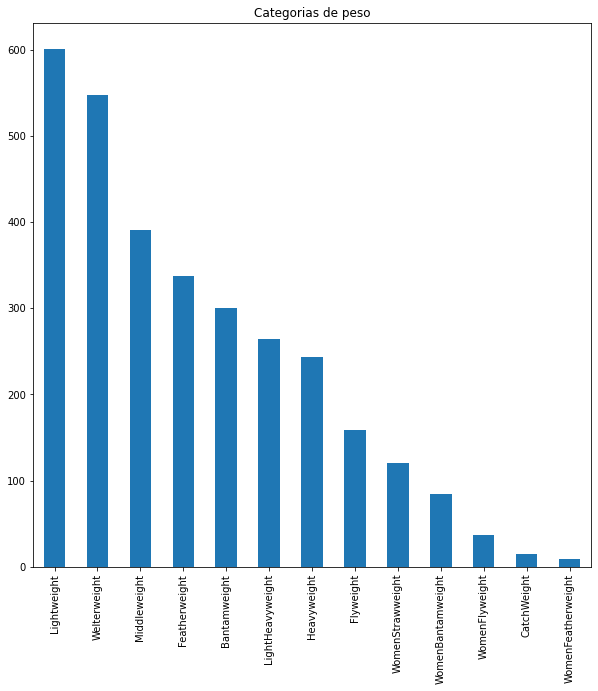

In [85]:
df['weight_class'].value_counts().plot.bar(title="Categorias de peso",figsize=(10,10))

# Contando a posição dominante

In [33]:
df['R_Stance'].value_counts().head()

Orthodox       3405
Southpaw        962
Switch          139
Open Stance      11
Name: R_Stance, dtype: int64

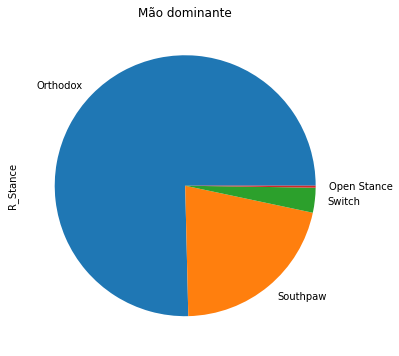

In [34]:
df['R_Stance'].value_counts().plot.pie( title="Mão dominante",figsize=(6,6))

# Separando por partidas que ocorreram títulos

In [35]:
to_drop = df_fight['title_bout'] == True

In [36]:
df_titulos = df_fight[to_drop]
df_titulos

,R_fighter,B_fighter,Referee,date,City/State,Country,Winner,title_bout,weight_class
25,Petr Yan,Aljamain Sterling,Mark Smith,2021-03-06,"Las Vegas, Nevada",USA,Blue,True,Bantamweight
26,Jan Blachowicz,Israel Adesanya,Herb Dean,2021-03-06,"Las Vegas, Nevada",USA,Red,True,LightHeavyweight
29,Amanda Nunes,Megan Anderson,Jason Herzog,2021-03-06,"Las Vegas, Nevada",USA,Red,True,WomenFeatherweight
62,Kamaru Usman,Gilbert Burns,Herb Dean,2021-02-13,"Las Vegas, Nevada",USA,Red,True,Welterweight
132,Deiveson Figueiredo,Brandon Moreno,Jason Herzog,2020-12-12,"Las Vegas, Nevada",USA,Draw,True,Flyweight
...,...,...,...,...,...,...,...,...,...
5737,Tito Ortiz,Vladimir Matyushenko,John McCarthy,2001-09-28,"Las Vegas, Nevada",USA,Red,True,LightHeavyweight
5739,Jens Pulver,Dennis Hallman,Mario Yamasaki,2001-09-28,"Las Vegas, Nevada",USA,Red,True,Lightweight
5744,Tito Ortiz,Elvis Sinosic,John McCarthy,2001-06-29,"East Rutherford, New Jersey",USA,Red,True,LightHeavyweight
5759,Tito Ortiz,Evan Tanner,John McCarthy,2001-02-23,"Atlantic City, New Jersey",USA,Red,True,LightHeavyweight


In [37]:
df_titulos['Country'].value_counts()

 USA                     231
 Canada                   23
 United Arab Emirates      8
 Brazil                    8
 Australia                 5
 Mexico                    4
 United Kingdom            4
 China                     1
 Germany                   1
Name: Country, dtype: int64

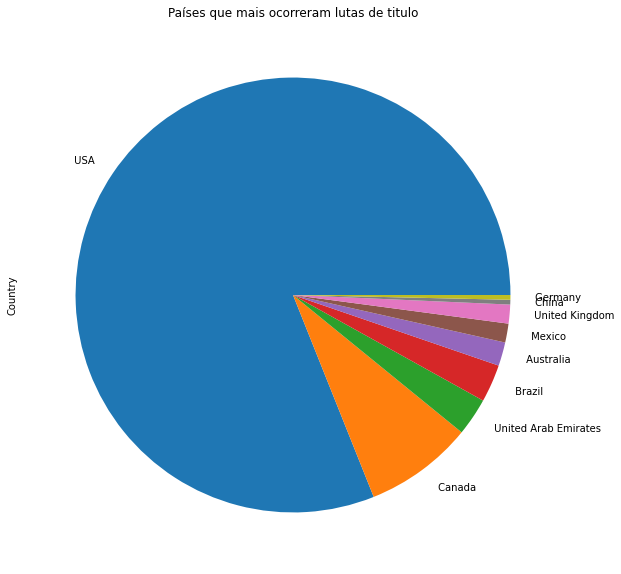

In [38]:
df_titulos['Country'].value_counts().plot.pie(y='Paises', title="Países que mais ocorreram lutas de titulo",figsize=(10,10))

In [39]:
df_titulos['City/State'].value_counts()

Las Vegas,  Nevada                 132
Toronto,  Ontario                   10
Anaheim,  California                 9
Abu Dhabi,  Abu Dhabi                8
Los Angeles,  California             8
New York City,  New York             7
Houston,  Texas                      7
Montreal,  Quebec                    7
Newark,  New Jersey                  6
Sacramento,  California              6
Dallas,  Texas                       6
Atlantic City,  New Jersey           5
Chicago,  Illinois                   5
Atlanta,  Georgia                    4
Boston,  Massachusetts               4
Mexico City,  Distrito Federal       4
Brooklyn,  New York                  4
Rio de Janeiro,  Rio de Janeiro      4
Uncasville,  Connecticut             3
Melbourne,  Victoria                 3
Seattle,  Washington                 2
London,  England                     2
Edmonton,  Alberta                   2
Columbus,  Ohio                      2
Belo Horizonte,  Minas Gerais        2
Denver,  Colorado        

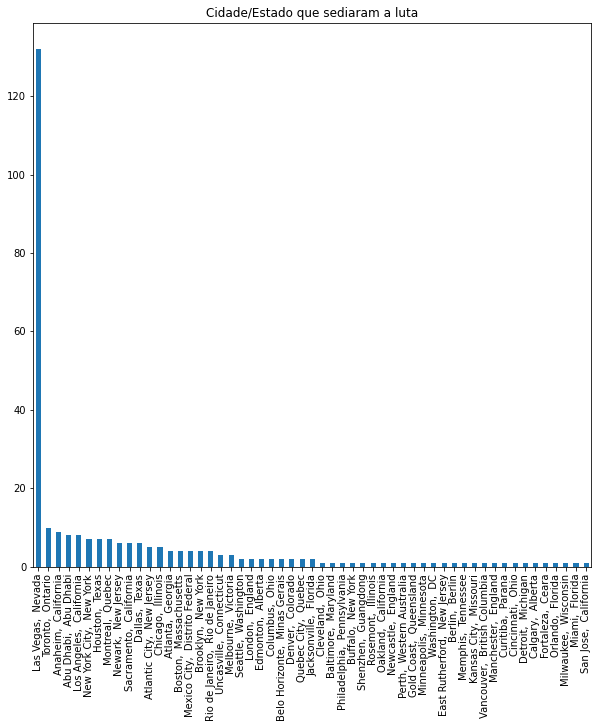

In [40]:
df_titulos['City/State'].value_counts().plot.bar(y='Cidade/Estados', title="Cidade/Estado que sediaram a luta",figsize=(10,10))

In [41]:
df_titulos['Referee'].value_counts().head(10)

Herb Dean           87
John McCarthy       71
Marc Goddard        23
Yves Lavigne        21
Dan Miragliotta     16
Steve Mazzagatti    13
Mario Yamasaki      12
Keith Peterson       8
Jason Herzog         6
Josh Rosenthal       6
Name: Referee, dtype: int64

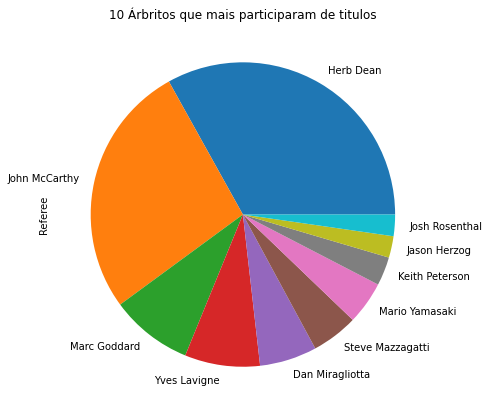

In [42]:
df_titulos['Referee'].value_counts().head(10).plot.pie(y='Juizes', title='10 Árbritos que mais participaram de titulos',figsize=(7,7))

# Lutadores que mais venceram nos ultimos 10 anos

In [43]:
# Mudando o indice para filtrar os ultimos 10 anos
df.set_index('date', inplace=True)

# selecionando as lutas dos ultimos 10 anos 
df = df.loc['2019-06-08':'2010-01-0']

# Tirando as colunas que não interessam
important_dataall = df[['R_fighter', 'B_fighter', 'Winner']]
important_datared = df[['R_fighter', 'B_fighter', 'Winner']]
important_datablue = df[['R_fighter', 'B_fighter', 'Winner']]
important_dataall.head()

,R_fighter,B_fighter,Winner
date,,,
2019-06-08,Aljamain Sterling,Pedro Munhoz,Red
2019-06-08,Tatiana Suarez,Nina Ansaroff,Red
2019-06-08,Tai Tuivasa,Blagoy Ivanov,Blue
2019-06-08,Valentina Shevchenko,Jessica Eye,Red
2019-06-08,Jimmie Rivera,Petr Yan,Blue


In [44]:
def get_winner(row):
    if row['Winner'] == 'Red':
        return row['R_fighter']
    elif row['Winner'] == 'Blue':
        return row['B_fighter']
    else:
        return None
    
#
pd.options.mode.chained_assignment = None 

# Salvando o nome do vencedor na nova coluna
important_dataall['Winner_name'] = important_dataall.apply(get_winner, axis=1)

# Contando as ocorrencias de cada nome
winner = important_dataall['Winner_name']
winner.value_counts().head()

Donald Cerrone      23
Dustin Poirier      17
Jim Miller          15
Rafael Dos Anjos    15
Jon Jones           15
Name: Winner_name, dtype: int64

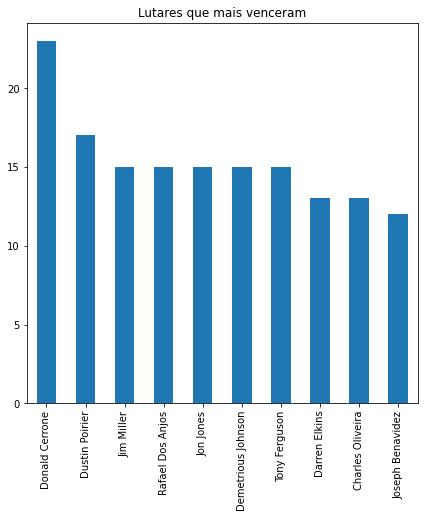

In [45]:
winner.value_counts().head(10).plot.bar(y='nomes', title='Lutares que mais venceram',figsize=(7,7))

In [46]:
def get_winnerblue(row):
    if row['Winner'] == 'Blue':
        return row['B_fighter']
    else:
        return None
    
#
pd.options.mode.chained_assignment = None 

# Salvando o nome do vencedor na nova coluna
important_datablue['Winner_name'] = important_datablue.apply(get_winnerblue, axis=1)

# Contando as ocorrencias de cada nome
winnerblue = important_datablue['Winner_name']
winnerblue.value_counts().head()

Kevin Lee           8
Charles Oliveira    8
Nik Lentz           7
Yoel Romero         7
Rafael Dos Anjos    7
Name: Winner_name, dtype: int64

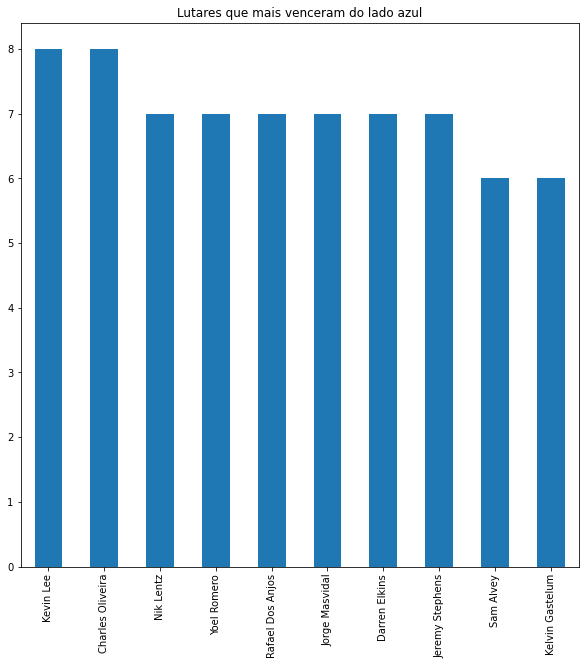

In [47]:
winnerblue.value_counts().head(10).plot.bar(y='nomes', title='Lutares que mais venceram do lado azul',figsize=(10,10))

In [48]:
def get_winnerred(row):
    if row['Winner'] == 'Red':
        return row['R_fighter']
    else:
        return None
    
#
pd.options.mode.chained_assignment = None 

# Salvando o nome do vencedor na nova coluna
important_dataall['Winner_name'] = important_dataall.apply(get_winnerred, axis=1)

# Contando as ocorrencias de cada nome
winnerred = important_dataall['Winner_name']
winnerred.value_counts().head()

Donald Cerrone        18
Dustin Poirier        14
Jon Jones             13
Jim Miller            13
Demetrious Johnson    12
Name: Winner_name, dtype: int64

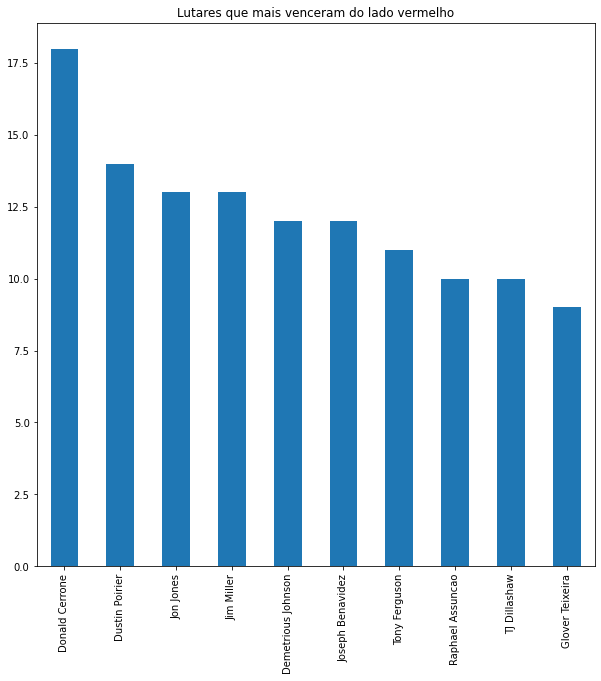

In [49]:
winnerred.value_counts().head(10).plot.bar(y='nomes', title='Lutares que mais venceram do lado vermelho',figsize=(10,10))

# Lutadores que mais venceram por KO/TKO

In [50]:
df_KO_TKO = df[["R_fighter","B_fighter","Winner","B_win_by_KO/TKO",'R_win_by_KO/TKO']]

In [51]:
df_KO_TKO

,R_fighter,B_fighter,Winner,B_win_by_KO/TKO,R_win_by_KO/TKO
date,,,,,
2019-06-08,Aljamain Sterling,Pedro Munhoz,Red,3,1
2019-06-08,Tatiana Suarez,Nina Ansaroff,Red,0,1
2019-06-08,Tai Tuivasa,Blagoy Ivanov,Blue,0,2
2019-06-08,Valentina Shevchenko,Jessica Eye,Red,0,0
2019-06-08,Jimmie Rivera,Petr Yan,Blue,2,1
...,...,...,...,...,...
2010-01-02,Sam Stout,Joe Lauzon,Red,2,0
2010-01-02,Rashad Evans,Thiago Silva,Red,5,4
2010-01-02,Mark Munoz,Ryan Jensen,Red,0,0


In [52]:
#separando em dois dataframes "azul" e "vermelho"
df_blue = pd.DataFrame(df_KO_TKO.groupby(['B_fighter'], sort=False)['B_win_by_KO/TKO'].max())
df_red = pd.DataFrame(df_KO_TKO.groupby(['R_fighter'], sort=False)['R_win_by_KO/TKO'].max())

In [53]:
#Filtrando mais o dataframe "azul"
df_blue["fighter"] = df_blue.index
df_blue.set_index(np.arange(1062),inplace =True)
df_blue = df_blue[["fighter",'B_win_by_KO/TKO']]
df_blue["KO/TKO"] = df_blue["B_win_by_KO/TKO"]
del df_blue["B_win_by_KO/TKO"]

In [54]:
#Filtrando mais o dataframe "vermelho"
df_red["fighter"] = df_red.index
df_red.set_index(np.arange(927),inplace =True)
df_red.rename(columns={'R_win_by_KO/TKO':'KO/TKO'},inplace =True)
df_red = df_red[["fighter",'KO/TKO']] 

In [55]:
#Juntando os dois dataframes
df_KO_TKO1 = pd.concat([df_red,df_blue])
df_KOS = pd.DataFrame(df_KO_TKO1.groupby(['fighter'], sort=False)['KO/TKO'].max())

In [56]:
#Ajustando o maior numero de KO_TKO
df_KOS["fighter1"] = df_KOS.index
df_KOS.set_index(np.arange(1178),inplace = True)
df_KOS.rename(columns={'fighter1':'fighter'},inplace =True)
df_KOS = df_KOS[['fighter','KO/TKO']]

In [57]:
#Ordem decrescente
df_KOS = df_KOS.sort_values(by = 'KO/TKO',ascending =False)

In [58]:
df_KOS = df_KOS.dropna()
df_KOS

,fighter,KO/TKO
559,Anthony Johnson,11
499,Anderson Silva,11
356,Vitor Belfort,11
568,Cain Velasquez,10
241,Donald Cerrone,10
...,...,...
769,Mike Ricci,0
221,Mizuto Hirota,0
220,Elias Garcia,0
772,Yuri Villefort,0


In [59]:
filtro = df_KOS['KO/TKO'] > 0
New_df_KOS = df_KOS[filtro]
New_df_KOS

,fighter,KO/TKO
559,Anthony Johnson,11
499,Anderson Silva,11
356,Vitor Belfort,11
568,Cain Velasquez,10
241,Donald Cerrone,10
...,...,...
443,Ryan Benoit,1
441,Cyril Asker,1
470,Frankie Perez,1
407,Vinc Pichel,1


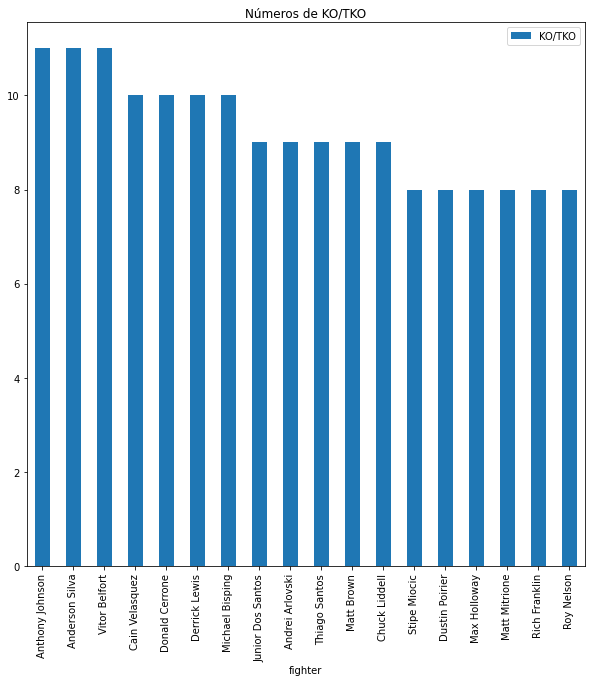

In [60]:
plot = New_df_KOS.head(18).plot.bar(y='KO/TKO', x='fighter', title='Números de KO/TKO',figsize=(10,10))

# 
# MODELO DE PREDIÇÃO DAS LUTAS
# 

### Utilizando Rando Forest:

In [61]:
df.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'City/State', 'Country', 'Winner',
       'title_bout', 'weight_class', 'B_total_rounds_fought',
       'B_total_title_bouts', 'B_wins', 'B_losses', 'B_draw',
       'B_win_by_KO/TKO', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'B_age', 'R_total_rounds_fought', 'R_total_title_bouts',
       'R_wins', 'R_losses', 'R_draw', 'R_win_by_KO/TKO', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age'],
      dtype='object')

In [62]:
#Características usadas
caract = ['B_age', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs',
         'R_age', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs']

In [63]:
# Rótulos usados
label = ['Winner']

In [64]:
df_rnd = df[['B_age', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs',
         'R_age', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'Winner']]

In [65]:
df_rnd.head()

,B_age,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_age,R_Height_cms,R_Reach_cms,R_Weight_lbs,Winner
date,,,,,,,,,
2019-06-08,32.0,167.64,165.10,135.0,29.0,170.18,180.34,135.0,Red
2019-06-08,33.0,165.10,162.56,115.0,28.0,165.10,167.64,115.0,Red
2019-06-08,32.0,180.34,185.42,250.0,26.0,187.96,190.50,264.0,Blue
2019-06-08,32.0,167.64,167.64,125.0,31.0,165.10,167.64,125.0,Red
2019-06-08,26.0,170.18,170.18,135.0,29.0,162.56,172.72,135.0,Blue


In [66]:
# Importação de LabelEncoder
from sklearn import preprocessing

label = list(df['Winner'])

# criando labelEncoder
le = preprocessing.LabelEncoder()

# Convertendo os rótulos em números.
label_encoded=le.fit_transform(label)

#Blue = 0, Draw = 1 e Red = 2

In [67]:
df_rnd.drop('Winner', axis=1)

,B_age,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_age,R_Height_cms,R_Reach_cms,R_Weight_lbs
date,,,,,,,,
2019-06-08,32.0,167.64,165.10,135.0,29.0,170.18,180.34,135.0
2019-06-08,33.0,165.10,162.56,115.0,28.0,165.10,167.64,115.0
2019-06-08,32.0,180.34,185.42,250.0,26.0,187.96,190.50,264.0
2019-06-08,32.0,167.64,167.64,125.0,31.0,165.10,167.64,125.0
2019-06-08,26.0,170.18,170.18,135.0,29.0,162.56,172.72,135.0
...,...,...,...,...,...,...,...,...
2010-01-02,25.0,177.80,180.34,155.0,25.0,175.26,177.80,155.0
2010-01-02,27.0,187.96,187.96,205.0,30.0,182.88,190.50,205.0
2010-01-02,32.0,185.42,193.04,185.0,31.0,182.88,180.34,185.0


In [68]:
lbl= {'Winner': label_encoded}
df_lbl = pd.DataFrame(lbl)

df_rnd = df_rnd.assign(Winner=label_encoded)

In [69]:
df_rnd.head(15)

,B_age,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_age,R_Height_cms,R_Reach_cms,R_Weight_lbs,Winner
date,,,,,,,,,
2019-06-08,32.0,167.64,165.10,135.0,29.0,170.18,180.34,135.0,2
2019-06-08,33.0,165.10,162.56,115.0,28.0,165.10,167.64,115.0,2
2019-06-08,32.0,180.34,185.42,250.0,26.0,187.96,190.50,264.0,0
2019-06-08,32.0,167.64,167.64,125.0,31.0,165.10,167.64,125.0,2
2019-06-08,26.0,170.18,170.18,135.0,29.0,162.56,172.72,135.0,0
2019-06-08,36.0,185.42,185.42,155.0,35.0,180.34,193.04,155.0,2
2019-06-08,25.0,165.10,167.64,125.0,33.0,160.02,162.56,115.0,0
2019-06-08,31.0,167.64,170.18,135.0,32.0,162.56,162.56,135.0,2
2019-06-08,34.0,160.02,162.56,115.0,29.0,165.10,160.02,115.0,2


In [70]:
# Importa a função train_test_split
from sklearn.model_selection import train_test_split

X=df_rnd[['B_age', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs',
          'R_age', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs']]  # Características
y=df_rnd['Winner']  # Rótulos

# Separa a conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% para treinamento e 30% para teste

In [71]:
# Importa o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [72]:
# Importa o módulo metrics de scikit-learn metrics para cálculo de acurácia
from sklearn import metrics

# Modelo de acurácia; com qual frequência o classificador é correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5466237942122186


In [73]:
df_rnd.head()

,B_age,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_age,R_Height_cms,R_Reach_cms,R_Weight_lbs,Winner
date,,,,,,,,,
2019-06-08,32.0,167.64,165.10,135.0,29.0,170.18,180.34,135.0,2
2019-06-08,33.0,165.10,162.56,115.0,28.0,165.10,167.64,115.0,2
2019-06-08,32.0,180.34,185.42,250.0,26.0,187.96,190.50,264.0,0
2019-06-08,32.0,167.64,167.64,125.0,31.0,165.10,167.64,125.0,2
2019-06-08,26.0,170.18,170.18,135.0,29.0,162.56,172.72,135.0,0


In [74]:
# Realiza a predição com base em um nova entrada
clf.predict([[31, 165.10, 170.18, 135, 27, 170.18, 177.80, 135]])

array([2])

In [75]:
# Realiza a predição com base em um nova entrada
clf.predict([[28.0,152.40,154.94,115.0,25.0,160.02,160.02,115.0]])

array([2])

In [76]:
# Realiza a predição com base em um nova entrada
clf.predict([[20.0,162.40,144.94,115.0,27.0,170.02,160.02,130.0]])

array([2])

In [77]:
# Importa o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
#n_jobs=2
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [79]:
feature_imp = pd.Series(clf.feature_importances_,index=df_rnd.columns[0:8]).sort_values(ascending=False)
feature_imp

R_age           0.163444
B_age           0.163216
R_Reach_cms     0.136321
B_Reach_cms     0.132640
B_Height_cms    0.122981
R_Height_cms    0.118542
B_Weight_lbs    0.083472
R_Weight_lbs    0.079384
dtype: float64

In [80]:
#Os pesos não estão tendo muita relevância

No handles with labels found to put in legend.


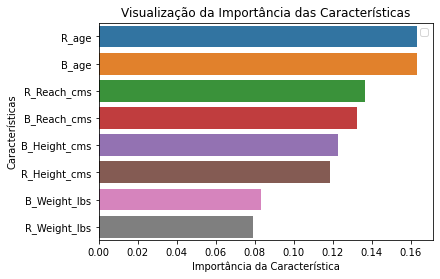

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.legend()
plt.show()

In [82]:
# Importa a função train_test_split
from sklearn.model_selection import train_test_split

X=df_rnd[['B_age', 'B_Height_cms', 'B_Reach_cms',
          'R_age', 'R_Height_cms', 'R_Reach_cms']]  # Características
y=df_rnd['Winner']  # Rótulos

# Separa a conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% para treinamento e 30% para teste

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

# Realiza a predição utilizando o conjunto de teste
y_pred=clf.predict(X_test)

# Importa o módulo metrics de scikit-learn metrics para cálculo de acurácia
from sklearn import metrics

# Modelo de acurácia; com qual frequência o classificador é correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5348338692390139
